# 1. Genotype

First we load the eids of patients with a pathogenic variant in the Whole Exome 450K data

In [98]:
outcome <- readRDS("outcome.rds")
head(outcome)

,eid,LDLR,APOB,PCSK9,ANY
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000016,0,0,0,0
2,1000021,0,0,0,0
3,1000033,0,0,0,0
4,1000049,0,0,0,0
5,1000057,0,0,0,0
6,1000065,0,0,0,0


# 2. Phenotype

We then load the phenotype data

In [99]:
require(data.table)
phenotype  <- as.data.frame(fread("data_participant.tsv"))
phenotype2 <- as.data.frame(fread("data2_participant.tsv"))
data <- subset(phenotype, eid %in% outcome$eid)
data2 <- subset(phenotype2, eid %in% outcome$eid)
data <- merge(data,data2, by="eid")

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




## 2.1 Prepare Phenotype

We create a new function to remove levels from factors

In [100]:
require(dplyr)
removeLevels <- function(data, variable, excl.values){
  data[which(data[,variable] %in% excl.values),variable]<- NA
  data[,variable] <- droplevels(data[,variable])
}

### 2.1.1 Demographics

#### 2.1.2  Gender

In [4]:
data$gender <- data$p31
data$gender <- as.factor(data$gender)
table(data$gender) # need to recode as in FHSC


Female   Male 
246590 208120 

#### 2.1.3 Country

In [5]:
data$country <- data$p1647_i0
data$country[data$country==""] <- "Unknown"
data$country <- as.factor(data$country )

data$country <- recode_factor(data$country,
                              'Republic of Ireland'="Elsewhere", 
                              'Do not know'='unknown/missing',
                              'Prefer not to answer'='unknown/missing')

data$country <- removeLevels(data, "country", c("unknown/missing","Unknown")) 
table(data$country)
#unique(data$country)  # not very useful either UK or elsewhere!


       Elsewhere          England Northern Ireland         Scotland 
           40344           353778             2794            36508 
           Wales 
           20034 

#### 2.1.4 Ethnicity

In [6]:
data$ethnicity <- data$p21000_i0
data$ethnicity[data$ethnicity==""] <- "unknown"
data$ethnicity <- as.factor(data$ethnicity )

data$ethnicity <- recode_factor(data$ethnicity,
                                  'Do not know'='unknown',
                                  'Prefer not to answer'='unknown/missing',
                                  "Other ethnic group"="unknown/missing",
                                  "African"="black",
                                  "Caribbean"="black",
                                  "Black or Black British"="black",
                                  "Any other Black background"="black",
                                  "British"="white",
                                  "White"="white",
                                  "Any other white background"="white",
                                  "Irish"="white",
                                  "White and Black Caribbean"="mixed",
                                  "White and Black African"="mixed",
                                  "Any other mixed background"="mixed",
                                  "Mixed"="mixed",
                                  "White and Asian"="mixed",
                                  "Chinese"="oriental/Asian",
                                  "Indian"="oriental/Asian",
                                  "Pakistani"="oriental/Asian",
                                  "Bangladeshi"="oriental/Asian",
                                  "Asian or Asian British"="oriental/Asian",
                                  "Any other Asian background"="oriental/Asian")
data$ethnicity <- removeLevels(data, "ethnicity", c("unknown/missing","unknown")) 

table(data$ethnicity) # useful 


         black          white          mixed oriental/Asian 
          7111         428443           2637          10284 

#### 2.1.5  Occupation

In [7]:
occupation_mapping <- read.csv("tables/occupations_table.csv")
data$occupation<- data$p20277_i0
data$occupation[data$occupation==""]<-"unknown/missing"
data$occupation <- sapply(data$occupation, FUN =function(x){gsub("-", "", x)} )
for(i in 1:nrow(occupation_mapping)){
    data$occupation[data$occupation==occupation_mapping[i,1]]<-occupation_mapping[i,2]
}
data$occupation <- as.factor(data$occupation)
data$occupation <- removeLevels(data, "occupation", c("unknown/missing")) 
table(data$occupation)


      Administrative and Secretarial Occupations 
                                           45926 
Associate Professional and Technical Occupations 
                                           51042 
                          Elementary Occupations 
                                           15023 
                   Managers and Senior Officials 
                                           50789 
                    Personal Service Occupations 
                                           18056 
           Process, Plant and Machine Operatives 
                                           13547 
                        Professional Occupations 
                                           68340 
          Sales and Customer Service Occupations 
                                           10343 
                      Skilled Trades Occupations 
                                           21982 

#### 2.1.6 Education

In [8]:
data$education <- data$p6138_i0
# find Highest qualification
qualifications <- c("College or University degree", "A levels/AS levels or equivalent",
                    "O levels/GCSEs or equivalent","CSEs or equivalent","NVQ or HND or HNC or equivalent",
                    "Other professional qualifications eg: nursing, teaching","None of the above","Prefer not to answer")
data$education_tmp <- "unknown/missing"
for( i in length(qualifications):1){
    data$education_tmp <- ifelse(grepl(qualifications[i],data$education),qualifications[i],data$education_tmp)
}
data$education <- as.factor(data$education_tmp)
data$education <- removeLevels(data, "education", c("unknown/missing")) 

table(data$education)
#sum(!is.na(data$education))
#unique(data$education) # -- too many occupation need to regroup


                       A levels/AS levels or equivalent 
                                                  50590 
                           College or University degree 
                                                 147202 
                                     CSEs or equivalent 
                                                  24531 
                                      None of the above 
                                                  77399 
                        NVQ or HND or HNC or equivalent 
                                                  29862 
                           O levels/GCSEs or equivalent 
                                                  96038 
Other professional qualifications eg: nursing, teaching 
                                                  23589 
                                   Prefer not to answer 
                                                   4942 

#### 2.1.7 Year of birth (DOB)

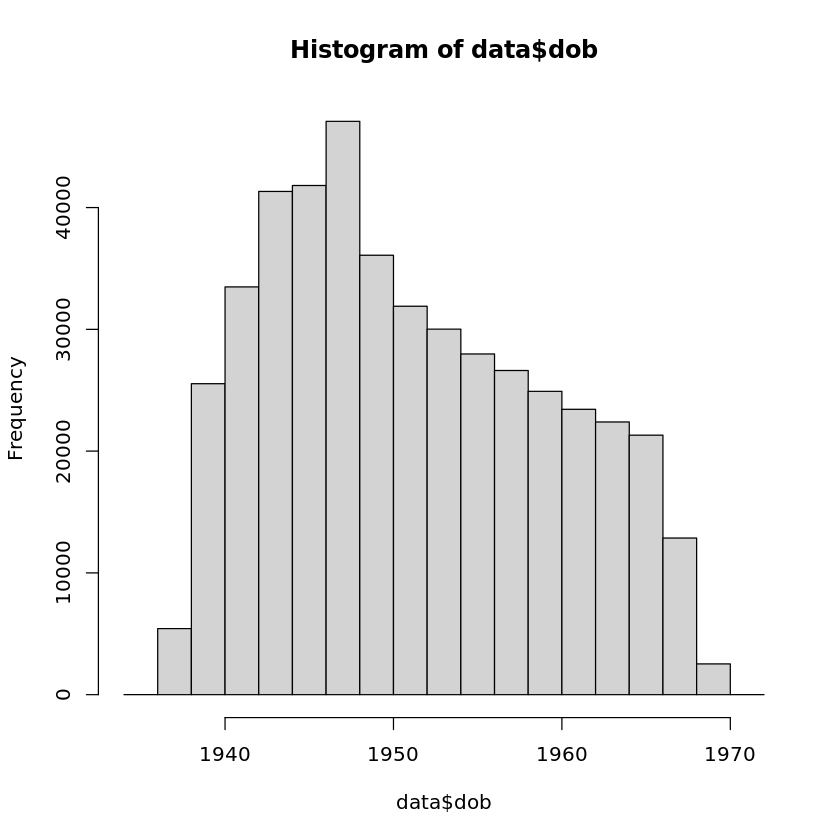

In [114]:
data$dob <- as.numeric(data$p34)
hist(data$dob )

#### 2.1.8  Age at entry

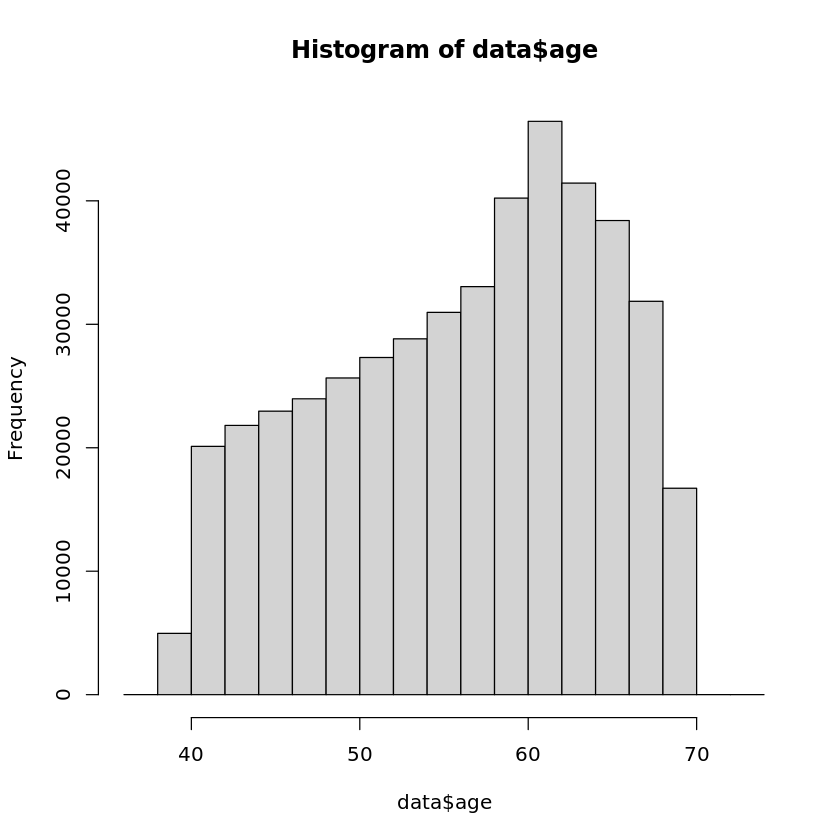

In [10]:
data$age <- data$p21003_i0
hist(data$age)

### 2.2 Anthrompometric Measurements

#### 2.2.1 Waist Circumference

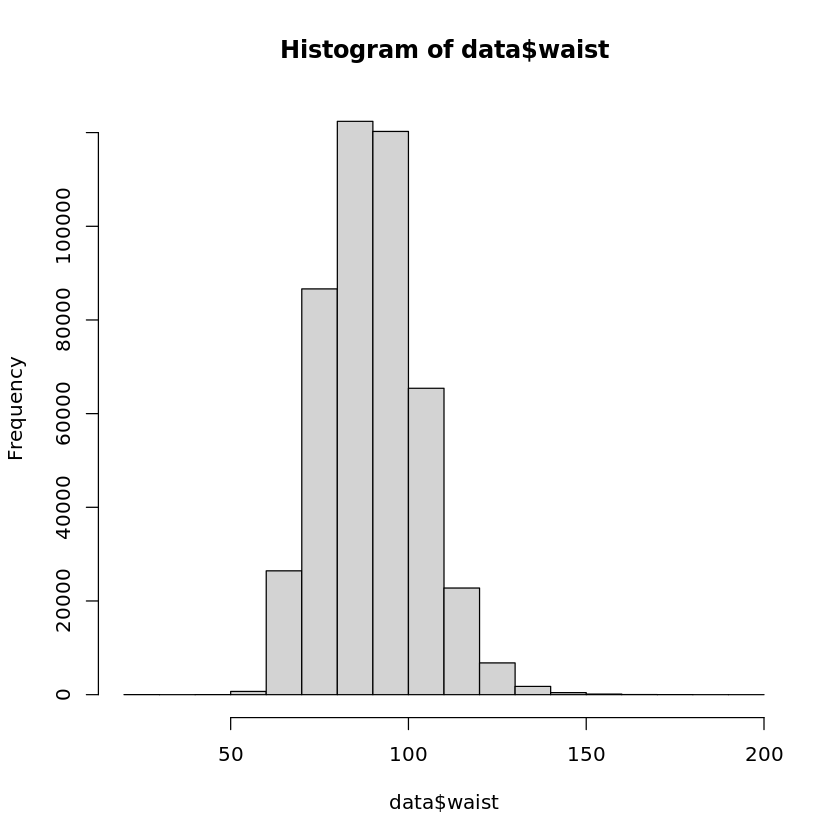

In [11]:
data$waist <- data$p48_i0
hist(data$waist)

#### 2.2.2 Weight

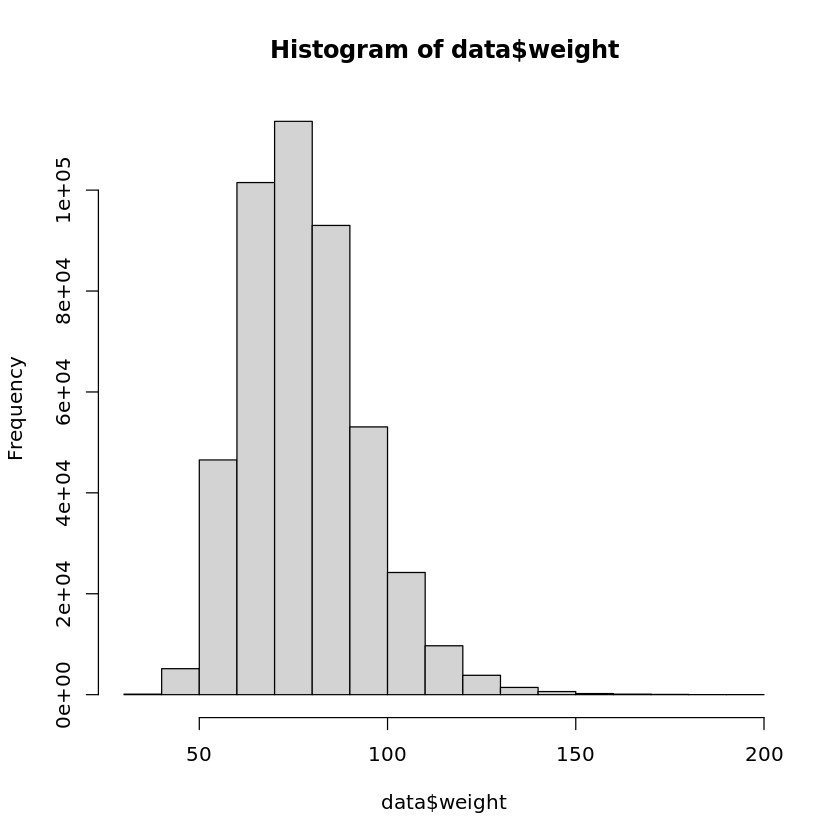

In [12]:
data$weight <- data$p21002_i0
hist(data$weight)

#### 2.2.3 BMI


     normal       obese  overweight underweight 
     144178      113069      193560        2150 

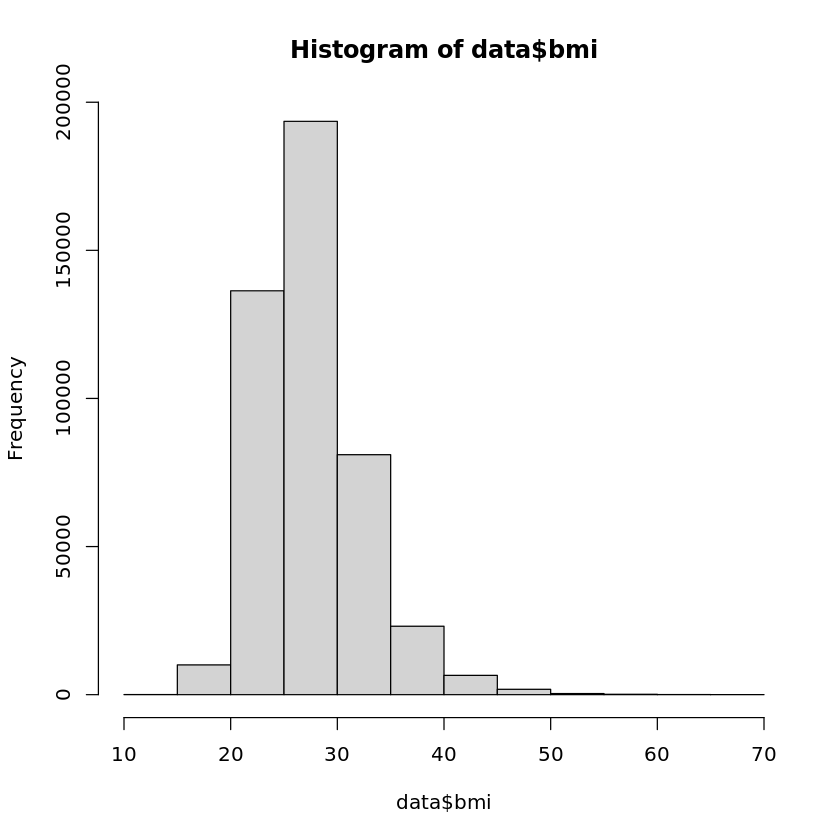

In [13]:
# max of boy mass index 
data$bmi <- apply( data[,paste('p21001_i',0:3,sep="")],1, FUN = function(x){
  x <- na.omit(x)
  if (length(x)>0){max(x)}else{return(NA)}
})
data$bmi_cat <- ifelse( data$bmi < 18.5, "underweight",ifelse( data$bmi < 25, "normal", ifelse( data$bmi < 30, "overweight", "obese")))
hist(data$bmi)
table(data$bmi_cat)

#### 2.2.4 Height

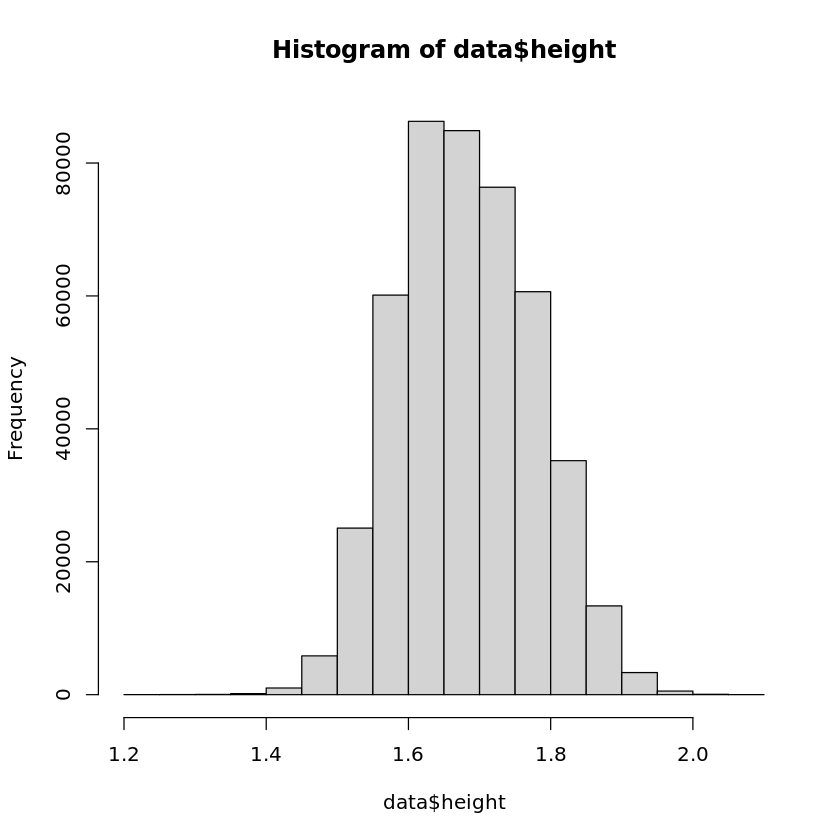

In [14]:
data$height <- sqrt(data$weight/data$bmi)
hist(data$height)

#### 2.2.5 SBP

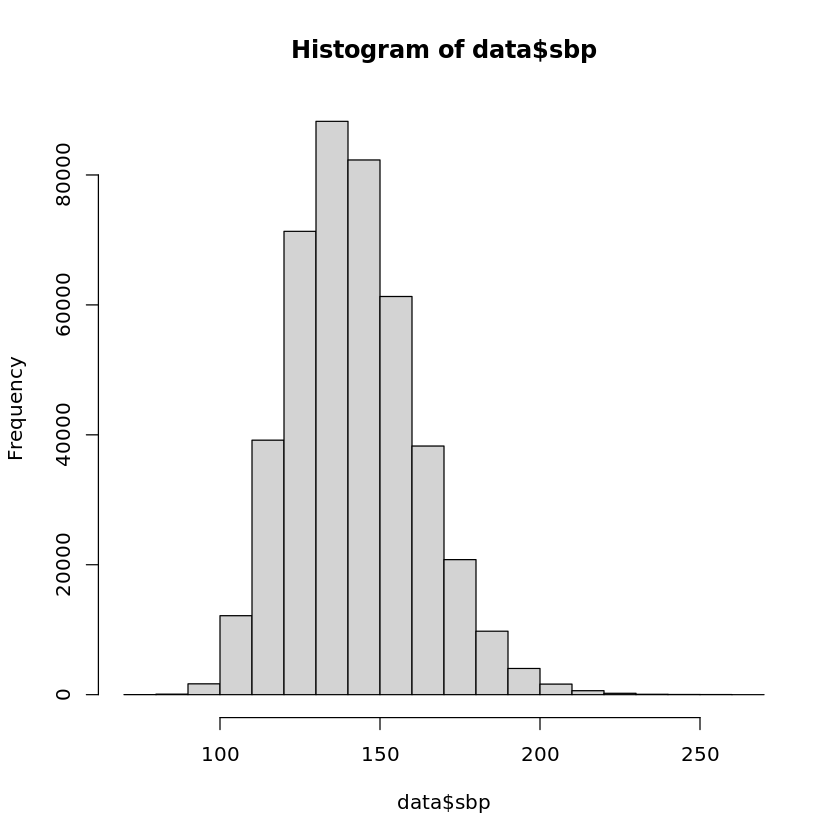

In [15]:
columns <- as.vector(sapply(paste('p4080_i',0:2,"_a",sep=""), paste, c("0","1"), sep=""))
data$sbp <- apply( data[,columns],1, FUN = function(x){
  x <- na.omit(x)
  if (length(x)>0){max(x)}else{return(NA)}
})
hist(data$sbp)

#### 2.2.6 DBP

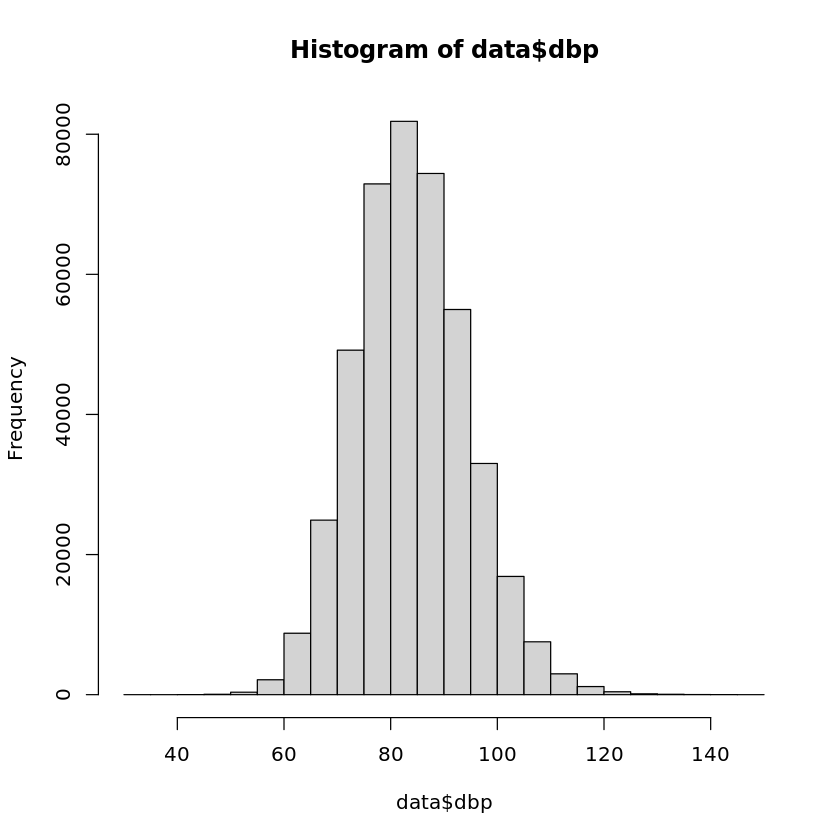

In [16]:
columns <- as.vector(sapply(paste('p4079_i',0:2,"_a",sep=""), paste, c("0","1"), sep=""))
data$dbp <- apply( data[,columns],1, FUN = function(x){
  x <- na.omit(x)
  if (length(x)>0){max(x)}else{return(NA)}
})
hist(data$dbp)

#### 2.2.7 HR

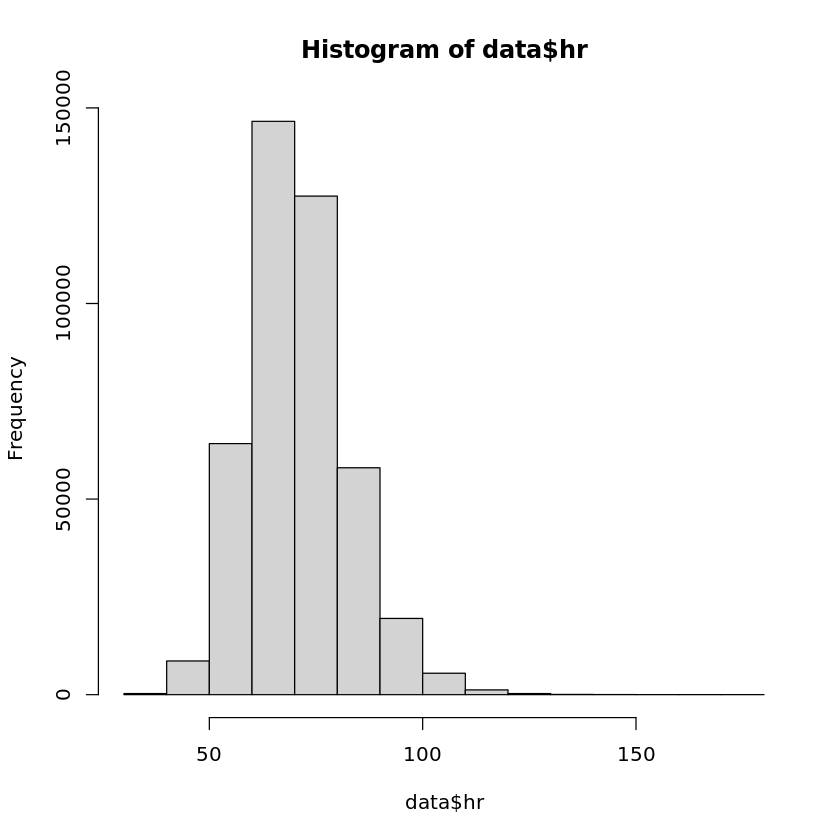

In [17]:
columns <- as.vector(sapply(paste('p102_i',0:2,"_a",sep=""), paste, c("0","1"), sep=""))
data$hr <- apply( data[,columns],1, FUN = function(x){
  x <- na.omit(x)
  if (length(x)>0){max(x)}else{return(NA)}
})
hist(data$hr)

### 2.3 Lifestyle
#### 2.3.1  Alcohol frequency

In [18]:
data$alcohol <- as.factor(data[,"p1558_i0"])
data$alcohol <- removeLevels(data, "alcohol", c("")) 
table(data$alcohol)


     Daily or almost daily                      Never 
                     92542                      36362 
      Once or twice a week One to three times a month 
                    117102                      50534 
      Prefer not to answer     Special occasions only 
                       526                      52180 
Three or four times a week 
                    104979 

#### 2.3.2 Smoking status

In [19]:
data$smoking <- as.factor(data[,"p20116_i0"])
data$smoking <- removeLevels(data, "smoking", c("")) 
table(data$smoking )


             Current                Never Prefer not to answer 
               47590               247643                 1853 
            Previous 
              157141 

#### 2.3.3 Smoking Pack-year

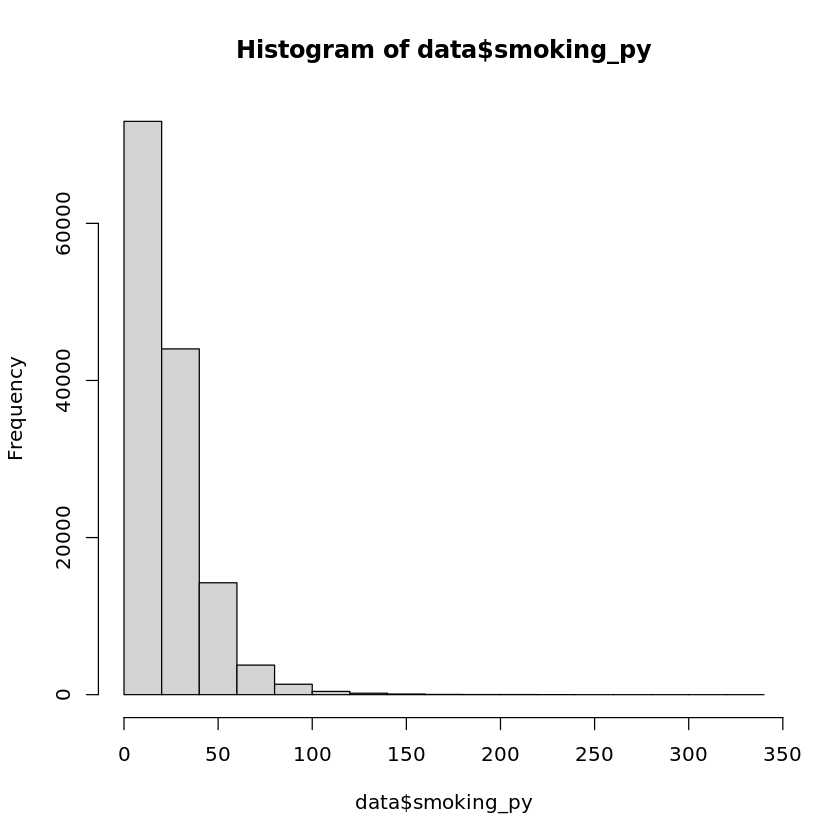

In [20]:
data$smoking_py <- as.numeric(data[,"p20161_i0"])
hist(data$smoking_py )

#### 2.3.4 Smoking time

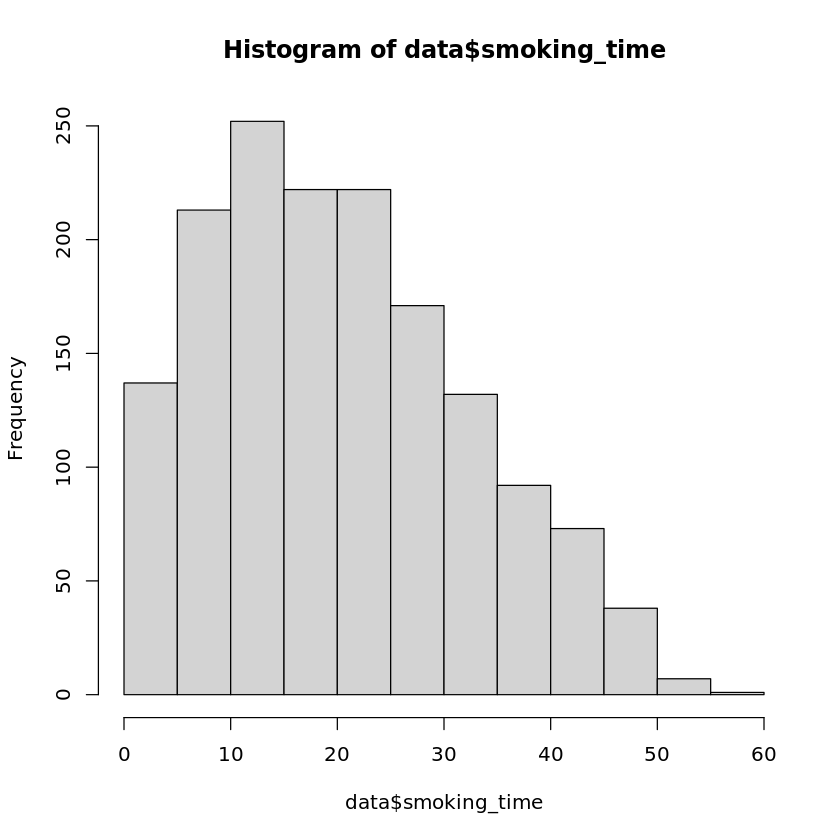

In [21]:
options(warn=-1)
data$smoking_start <- apply(data[,paste("p3436_i",0:3, sep="")], 1 , FUN= function(x) {
    x[x==""] <- NA
    x <- na.omit(x)
    if(length(x)==0){
        return(NA)
    }else{
        return(min(as.numeric(x)))
    }     
})
data$smoking_quit <- apply(data[,paste("p6194_i",0:3, sep="")], 1 , FUN= function(x) {
    x[x==""] <- NA
    x <- na.omit(x)
    if(length(x)==0){
        return(NA)
    }else{
        return(max(as.numeric(x)))
    }     
})
options(warn=1)

data$smoking_time <-  as.numeric(data$smoking_quit-data$smoking_start)
hist(data$smoking_time)

#### 2.3.5  Physical Activity 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


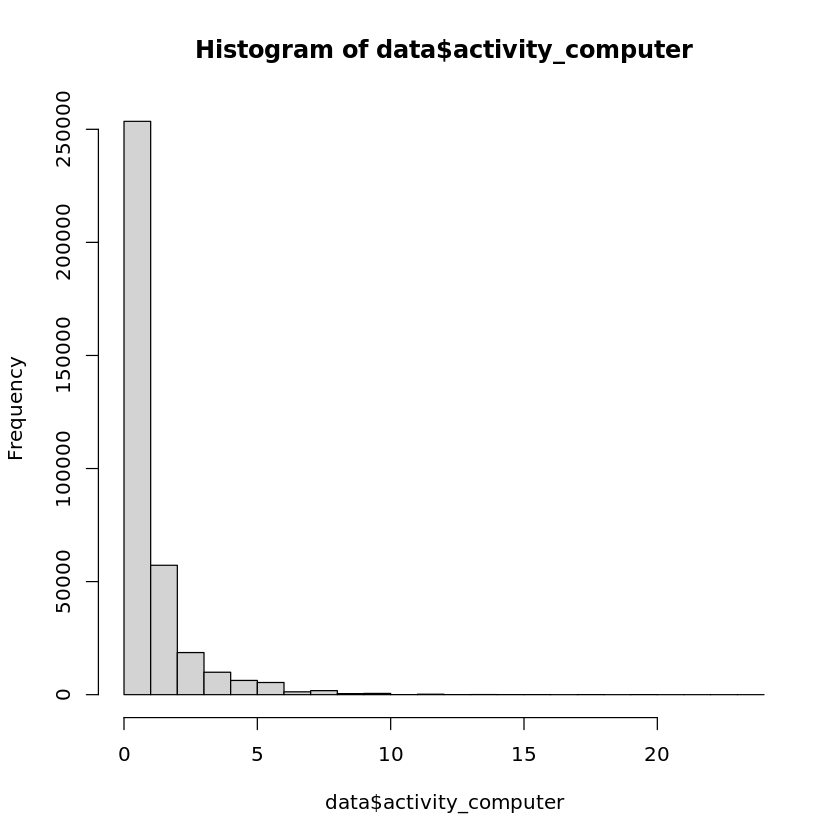

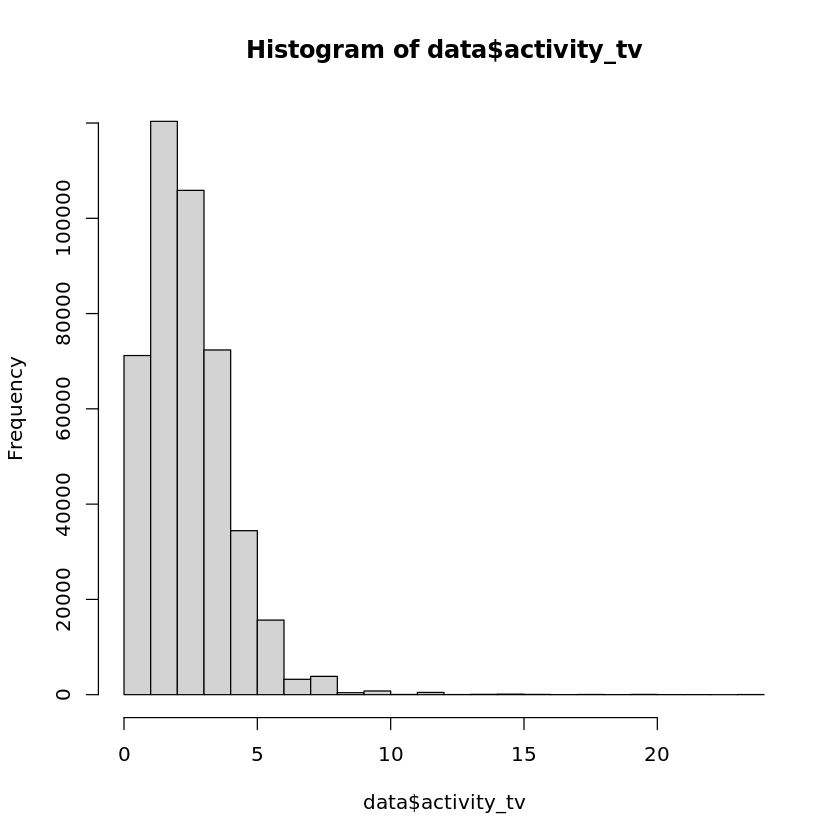

In [31]:
data$activity_computer <- as.numeric(data[,'p1080_i0'] )
data$activity_tv       <- as.numeric(data[,'p1070_i0'] )
hist(data$activity_computer)
hist(data$activity_tv)

### 2.3.6 Diet

In [47]:
data$diet_meat         <- data[,'p1349_i0']
data$diet_oily_fish    <- data[,'p1329_i0']
data$diet_nonoily_fish <- data[,'p1339_i0']
data$diet_cooked_veg   <- data[,'p1289_i0']
data$diet_raw_veg      <- data[,'p1299_i0']

### 2.4 Comorbidities

#### 2.4.1  Comorbidities (ICD10 codes)

The code below load the data.frame containing the set of ICD10 code for each co-morbidities variables.
For each patient and each variable, it then looks if there is a matching ICD10 code. 
If there is the age columns at onset are retrieved from another set of UK Biobank fields.     

In [101]:
file_icd10 <- read.csv("tables/morbidities_final.csv")
### Find if ECD10 coded and earliest age 
getEarliestEventAndDate <- function(data_input, icd10_codes){  
    ## provide ICD10
    icd10_codes_regex <- paste("^.*(", gsub(".","\\.",paste(icd10_codes,collapse="|"), fixed=T), ").*$",sep="")
    ## Find which one match
    data_input$has_event <- apply( data_input[,c('p41270','p41202','p41204')], 1, FUN = function(x){
        newX <- paste(x, collapse= " |--> ")
        return(ifelse(grepl(icd10_codes_regex, newX),1,0))
    })
    data_input[ data_input$has_event==1, "age_earliest_event"] <- apply(data_input[ data_input$has_event==1,c('p41270','p41202',
                        "dob",
                        paste("p41280_a",c(0:180), sep=""),
                        paste("p41262_a",c(0:74), sep=""))],1, FUN=function(x){ 
                                vect1 <- strsplit(as.character(x[1]), "\\|")
                                datesFields1 <- x[4:180+4]
                                dates1 <- datesFields1[unlist(sapply(vect1, FUN = function(y) { grep(icd10_codes_regex,y) }))]
                                dx_dates1 <- unlist(sapply(dates1, as.Date, origin="1970-01-01"))

                                vect2 <- strsplit(as.character(x[2]), "\\|")
                                datesFields2 <- x[180+5:length(x)]
                                dates2 <- datesFields2[unlist(sapply(vect2, FUN = function(y2) { grep(icd10_codes_regex,y2) }))]
                                dx_dates2 <- unlist(sapply(dates2, as.Date, origin="1970-01-01"))

                                allDates <- na.omit(c(dx_dates1,dx_dates2))
                                if(length(allDates)>0){
                                    minDate <- min(allDates)
                                    if (is.null(minDate) | is.na(minDate) | is.infinite(minDate)){
                                        return(NA)
                                    }else{
                                        return(as.numeric(format(as.Date(minDate, origin="1970-01-01"),"%Y")) - as.numeric(x[3]) )
                                    }
                                }else{
                                  return(NA)   
                                }
    })
    return(data_input[,c("has_event","age_earliest_event")])
}

In [39]:
for ( disease in colnames(file_icd10)[! colnames(file_icd10) %in% c("Code", "Disease")]) {
    message(paste("starting ", disease, sep=""))
    icd10_filtered                    <- getEarliestEventAndDate(data, file_icd10[file_icd10[,disease]==1,"Code"])
    data[, paste(disease, "_dx",sep="")]     <- icd10_filtered$has_event
    data[, paste(disease, "_dx",sep="")]     <- recode_factor(data[, paste(disease, "_dx",sep="")], "0"="no","1"="yes")
    data[, paste(disease, "_age",sep="")]    <- icd10_filtered $age_earliest_event
    message(paste(disease, " ready",sep=""))
}

starting cvd

cvd ready

starting ascvd

ascvd ready

starting lipid_storage_disorder

lipid_storage_disorder ready

starting psoriasis

psoriasis ready



### 2.5 Operations

#### 2.5.1  Operations (OPSC4 codes)

In [40]:
file_opsc4 <- read.csv("tables/operations_final.csv")
getOPSC4   <- function(data_input, opsc4_codes){
    opsc4_codes_regex <- paste("^.*(", paste(opsc4_codes,collapse="|"), ").*$",sep="")
    ## Find which one match
    return(apply( data_input[,c('p41272','p41200','p41210')], 1, FUN = function(x){
        newX <- paste(x, collapse= " |--> ")
        return(ifelse(grepl(opsc4_codes_regex, newX),1,0))
    }))
}

In [41]:
for ( operation in colnames(file_opsc4)[! colnames(file_opsc4) %in% c("Full.Name", "Code")][2:5]) {
    message(paste("starting ", operation, sep=""))
    data[, operation ]    <- getOPSC4(data, file_opsc4[file_opsc4[,operation]==1,"Code"])
    data[, operation ]    <- recode_factor(data[, operation ], "0"="no","1"="yes")
    message(paste(operation, " ready",sep=""))
}

starting heart_percutaneous_procedures

heart_percutaneous_procedures ready

starting arteries_op

arteries_op ready

starting arteries_percutaneous_procedures

arteries_percutaneous_procedures ready

starting vein_op

vein_op ready



### 2.6 Imaging test

#### 2.6.1 Carotid IMT

In [42]:
data$us_carotid_left_img1 <- data[,c("p20222_i2")]
data$us_carotid_left_img2 <- data[,c("p20222_i3")]

data$us_carotid_right_img1 <- data[,c("p20223_i2")]
data$us_carotid_right_img2 <- data[,c("p20223_i3")]

In [43]:
maxIMT <- function(x) { 
    x <- as.numeric(x)
    if(sum(is.na(x)) == 2 )
        return(NA)
    else
        return (max(x, na.rm=T)) 
}
options(warn=-1)
data$uscar_imt_120_max <- apply(data[,c("p22671_i2","p22671_i3")], 1, FUN= maxIMT)
data$uscar_imt_150_max <- apply(data[,c("p22674_i2","p22674_i3")], 1, FUN= maxIMT)
data$uscar_imt_210_max <- apply(data[,c("p22677_i2","p22677_i3")], 1, FUN= maxIMT)
data$uscar_imt_240_max <- apply(data[,c("p22680_i2","p22680_i3")], 1, FUN= maxIMT)
options(warn=1)

#### 2.6.2  Arterial Stifness Index

In [44]:
maxIMT <- function(x) { 
    x <- as.numeric(x)
    if(sum(is.na(x)) == 4 )
        return(NA)
    else
        return (max(x, na.rm=T)) 
}

data$max_art_stiffness <- apply(data[,c("p21021_i0", "p21021_i1", "p21021_i2", "p21021_i3")], 1, FUN = maxIMT)

#### 2.6.3  ECG

In [45]:
data$ecg_dataset1 <- data[, 'p20205_i2'] 
data$ecg_dataset2 <- data[, 'p20205_i3'] 

#### 2.6.4 MRI

In [46]:
data$mri_scout_img1 <- data[,'p20207_i2']
data$mri_scout_img2 <- data[,'p20207_i3']

data$mri_short_axis_img1 <- data[,'p20209_i2' ]
data$mri_short_axis_img2 <- data[,'p20209_i3']

data$mri_lv_out_img1 <- data[,'p20212_i3' ]
data$mri_lv_out_img2 <- data[,'p20212_i2']

data$mri_long_axis_img1 <- data[,'p20208_i2']
data$mri_long_axis_img2 <- data[,'p20208_i3' ]

### 2.7 Family History

In [48]:
# These seem a little off! 
relevant_columns <- c(paste("p20107_i",0:3, sep=""),
                      paste("p20110_i",0:3, sep=""),
                      paste("p20111_i",0:3, sep=""))

#### 2.7.1 Family history of ischaemic heart disease and other diseases of the circulatory system

In [49]:
data$famh_hd_sa <- apply( data[,relevant_columns], 1, FUN = function(x){
    ifelse(sum(grepl("Heart disease", x))>=1,1,0)
})
data$famh_hd_sa    <- recode_factor(data$famh_hd_sa, "0"="no","1"="yes")
table(data$famh_hd_sa)

icd10_fmh_cad <- getEarliestEventAndDate(data, c(paste("Z", c("82.4"), sep="")))
data$famh_cad <- icd10_fmh_cad$has_event
data$famh_cad <- recode_factor(data$famh_cad, "0"="no","1"="yes")
table(data$famh_cad)


    no    yes 
254154 200556 


    no    yes 
432082  22628 

#### 2.7.2 Family history of hypercholesterolemia

In [121]:
icd10_fmh_cad <- getEarliestEventAndDate(data, c(paste("Z", c("83\\.43"), sep="")))
sum(icd10_fmh_cad$has_event==1)
# no patient found with this code!!!

#### 2.7.2 Family history of stroke

In [50]:
data$famh_stroke_sa <- apply( data[,relevant_columns], 1, FUN = function(x){
    ifelse(sum(grepl("Stroke", x))>=1,1,0)
})
data$famh_stroke_sa <- recode_factor(data$famh_stroke_sa, "0"="no","1"="yes")
table(data$famh_stroke_sa)

icd10_fmh_stroke <- getEarliestEventAndDate(data, c(paste("Z", c("82.3"), sep="")))
data$famh_stroke <- icd10_fmh_stroke$has_event
data$famh_stroke <- recode_factor(data$famh_stroke, "0"="no","1"="yes")
table(data$famh_stroke)


    no    yes 
331199 123511 


    no    yes 
453496   1214 

#### 2.7.3 Family history of Diabetes Melitus

In [51]:
data$famh_dm_sa <- apply( data[,relevant_columns], 1, FUN = function(x){
    ifelse(sum(grepl("Diabetes", x))>=1,1,0)
})
data$famh_dm_sa <- recode_factor(data$famh_dm_sa, "0"="no","1"="yes")
table(data$famh_dm_sa)

icd10_fmh_dm <- getEarliestEventAndDate(data, c(paste("Z", c("83.3"), sep="")))
data$famh_dm <- icd10_fmh_dm$has_event
data$famh_dm <- recode_factor(data$famh_dm, "0"="no","1"="yes")
table(data$famh_dm)


    no    yes 
353740 100970 


    no    yes 
453906    804 

#### 2.7.4 High blood pressure

In [52]:
data$famh_ht_sa <- apply( data[,relevant_columns], 1, FUN = function(x){
    ifelse(sum(grepl("High blood pressure", x))>=1,1,0)
})
data$famh_ht_sa <- recode_factor(data$famh_ht_sa, "0"="no","1"="yes")

table(data$famh_ht_sa)


    no    yes 
232294 222416 

#### 2.7.5 Cancer

In [53]:
data$famh_cancer_sa <- apply( data[,relevant_columns], 1, FUN = function(x){
    ifelse(sum(grepl("cancer", x))>=1,1,0)
})
data$famh_cancer_sa <- recode_factor(data$famh_cancer_sa, "0"="no","1"="yes")
table(data$famh_cancer_sa)

icd10_fmh_neoplasm <- getEarliestEventAndDate(data, c(paste("Z", c("80"), sep="")))
data$famh_cancer   <- icd10_fmh_neoplasm$has_event
data$famh_cancer   <- recode_factor(data$famh_cancer, "0"="no","1"="yes")
table(data$famh_cancer)


    no    yes 
292124 162586 


    no    yes 
437268  17442 

#### 2.7.6 Overall  Death non-accidental

In [54]:
relevant_columns <- paste('p4501_i',0:3, sep="")
data$famh_death_sa <- apply( data[,relevant_columns], 1, FUN = function(x){
    ifelse(sum(grepl("Yes", x))>=1,1,0)
})
data$famh_death_sa <- recode_factor(data$famh_death_sa, "0"="no","1"="yes")
table(data$famh_death_sa)


    no    yes 
402416  52294 

#### 2.8 Lab measurements

In [55]:
labs <- read.csv("tables/labs.csv")

In [56]:
for(i in 1:nrow(labs)){
    data[,labs[i,"field"]] <- apply(data[,paste(labs[i,"code"],0:1, sep="")], 1 , FUN= function(x) {
    x[x==""] <- NA
    x <- na.omit(x)
    if(length(x)==0){
        return(NA)
    }else{
        return(max(as.numeric(x)))
    }     
})
}

In [57]:
data$ldl_fw  <- (data %>% mutate(ldl_fw = tc-hdl-tg/2.2))$ldl_fw
data$nonhdl  <- data$tc - data$hdl
data$lpa_cat <- as.factor(ifelse( data$lpa > 105, 1, 0 ) )
table(data$lpa_cat )


     0      1 
294941  53667 

### 2.8 Medications

In [60]:
meds <- read.csv("tables/medications_final.csv")

In [61]:
columns <- paste("p20003_i",0:3, sep="")
getMedications <- function(data, med_names){
    apply( data, 1, FUN = function(x){
        x[x==""]<-NA
        x <- na.omit(x)
        collapsed <- paste(x, collapse="|")
        vect2 <- unlist(strsplit(collapsed, "\\|"))
        ifelse(any(vect2 %in% med_names),1,0)
    })
}

In [62]:
for ( med_name in colnames(meds)[! colnames(meds) %in% c("Category","Count","ATC")]) {
    data[,med_name] <- getMedications(data[,columns],meds[meds[,med_name]!="","Category"])
    data[,med_name] <- as.factor(data[,med_name])
}

## 3. Finalise And Save Dataset

We merge the phenotype dataset with the outcome and save the dataset containing the new columns 

In [64]:
prepared_dataset <- merge(data, outcome, by="eid")
saveRDS(prepared_dataset, "prepared_dataset.rds")

In [67]:
colnames(prepared_dataset)

[1] "eid"                              "p1647_i0"                        
  [3] "p31"                              "p21000_i0"                       
  [5] "p52"                              "p34"                             
  [7] "p20277_i0"                        "p20277_i1"                       
  [9] "p20277_i2"                        "p20277_i3"                       
 [11] "p6138_i0"                         "p6138_i1"                        
 [13] "p6138_i2"                         "p6138_i3"                        
 [15] "p1807_i0"                         "p1807_i1"                        
 [17] "p1807_i2"                         "p1807_i3"                        
 [19] "p20107_i0"                        "p20107_i1"                       
 [21] "p20107_i2"                        "p20107_i3"                       
 [23] "p6141_i0"                         "p20110_i0"                       
 [25] "p20110_i1"                        "p20110_i2"                       
 [27] "p20110_i3"                        "p3526_i0"                        
 [29] "p3526_i1"                         "p3526_i2"                        
 [31] "p3526_i3"                         "p5057_i0"                        
 [33] "p20111_i0"                        "p20111_i1"                       
 [35] "p20111_i2"                        "p20111_i3"                       
 [37] "p4501_i0"                         "p4501_i1"                        
 [39] "p4501_i2"                         "p4501_i3"                        
 [41] "p4056_i0"                         "p42006"                          
 [43] "p42008"                           "p42010"                          
 [45] "p42012"                           "p5529_i0"                        
 [47] "p5529_i1"                         "p5529_i2"                        
 [49] "p5529_i3"                         "p41270"                          
 [51] "p41280_a0"                        "p41280_a1"                       
 [53] "p41280_a2"                        "p41280_a3"                       
 [55] "p41280_a4"                        "p41280_a5"                       
 [57] "p41280_a6"                        "p41280_a7"                       
 [59] "p41280_a8"                        "p41280_a9"                       
 [61] "p41280_a10"                       "p41280_a11"                      
 [63] "p41280_a12"                       "p41280_a13"                      
 [65] "p41280_a14"                       "p41280_a15"                      
 [67] "p41280_a16"                       "p41280_a17"                      
 [69] "p41280_a18"                       "p41280_a19"                      
 [71] "p41280_a20"                       "p41280_a21"                      
 [73] "p41280_a22"                       "p41280_a23"                      
 [75] "p41280_a24"                       "p41280_a25"                      
 [77] "p41280_a26"                       "p41280_a27"                      
 [79] "p41280_a28"                       "p41280_a29"                      
 [81] "p41280_a30"                       "p41280_a31"                      
 [83] "p41280_a32"                       "p41280_a33"                      
 [85] "p41280_a34"                       "p41280_a35"                      
 [87] "p41280_a36"                       "p41280_a37"                      
 [89] "p41280_a38"                       "p41280_a39"                      
 [91] "p41280_a40"                       "p41280_a41"                      
 [93] "p41280_a42"                       "p41280_a43"                      
 [95] "p41280_a44"                       "p41280_a45"                      
 [97] "p41280_a46"                       "p41280_a47"                      
 [99] "p41280_a48"                       "p41280_a49"                      
[101] "p41280_a50"                       "p41280_a51"                      
[103] "p41280_a52"                       "p41280_a53"                      
[105] "p41280_a54"                       "p41280_a

# 4. Feature Engineering 

## 4.1 Load dataset

In [26]:
prepared_dataset <- readRDS("prepared_dataset.rds")

## 4.2 Remove original columns from UK Biobank and "image" columns (we do not need them for this analysis)

In [27]:
cols_remove <- colnames(prepared_dataset)[grep("^((p[0-9]{1,7}(_[ai0-9]{0,10}){0,1}(_[ai0-9]{0,10}){0,1})|(.*img.*)|(.*dataset.*))$", colnames(prepared_dataset)) ]
prepared_dataset[ , cols_remove ] <- NULL
colnames(prepared_dataset)

[1] "eid"                              "gender"                          
  [3] "country"                          "ethnicity"                       
  [5] "occupation"                       "education"                       
  [7] "education_tmp"                    "dob"                             
  [9] "age"                              "waist"                           
 [11] "weight"                           "bmi"                             
 [13] "bmi_cat"                          "height"                          
 [15] "sbp"                              "dbp"                             
 [17] "hr"                               "alcohol"                         
 [19] "smoking"                          "smoking_py"                      
 [21] "smoking_start"                    "smoking_quit"                    
 [23] "smoking_time"                     "activity_computer"               
 [25] "activity_tv"                      "diabetes2_dx"                    
 [27] "diabetes2_age"                    "diabetesAny_dx"                  
 [29] "diabetesAny_age"                  "liver_dx"                        
 [31] "liver_age"                        "renal_dx"                        
 [33] "renal_age"                        "pure_hyperchol_dx"               
 [35] "pure_hyperchol_age"               "ht_dx"                           
 [37] "ht_age"                           "ht_heart_dx"                     
 [39] "ht_heart_age"                     "ht_renal_dx"                     
 [41] "ht_renal_age"                     "mi_dx"                           
 [43] "mi_age"                           "angina_dx"                       
 [45] "angina_age"                       "cad_dx"                          
 [47] "cad_age"                          "aneurism_dx"                     
 [49] "aneurism_age"                     "pad_dx"                          
 [51] "pad_age"                          "cardiac_arrest_dx"               
 [53] "cardiac_arrest_age"               "hf_dx"                           
 [55] "hf_age"                           "stroke_dx"                       
 [57] "stroke_age"                       "cbvd_dx"                         
 [59] "cbvd_age"                         "cvd_dx"                          
 [61] "cvd_age"                          "ascvd_dx"                        
 [63] "ascvd_age"                        "lipid_storage_disorder_dx"       
 [65] "lipid_storage_disorder_age"       "psoriasis_dx"                    
 [67] "psoriasis_age"                    "heart_percutaneous_procedures"   
 [69] "arteries_op"                      "arteries_percutaneous_procedures"
 [71] "vein_op"                          "uscar_imt_120_max"               
 [73] "uscar_imt_150_max"                "uscar_imt_210_max"               
 [75] "uscar_imt_240_max"                "max_art_stiffness"               
 [77] "diet_meat"                        "diet_oily_fish"                  
 [79] "diet_nonoily_fish"                "diet_cooked_veg"                 
 [81] "diet_raw_veg"                     "famh_hd_sa"                      
 [83] "famh_cad"                         "famh_stroke_sa"                  
 [85] "famh_stroke"                      "famh_dm_sa"                      
 [87] "famh_dm"                          "famh_ht_sa"                      
 [89] "famh_cancer_sa"                   "famh_cancer"                     
 [91] "famh_death_sa"                    "tc"                              
 [93] "ldl"                              "hdl"                             
 [95] "tg"                               "apoa"                            
 [97] "apob"                             "lpa"                             
 [99] "crp"                              "gluc"                            
[101] "hba1c"                            "ast"                             
[103] "alt"                              "ggt"                             
[105] "bili_total"                       "bili_dir

## 4.3 Derive the "disease" columns

In [28]:
cols_disease <- colnames(prepared_dataset)[grep("^.*_dx$", colnames(prepared_dataset)) ]
cols_age     <- gsub("_dx","_age", cols_disease)
cols         <- gsub("_dx","", cols_disease)
df           <- data.frame(dx = cols_disease, age = cols_age, col = cols )
gender       <-  prepared_dataset[, "gender"]
for (cdisease in 1:nrow(df)){
    disease <- prepared_dataset[, df[cdisease, "dx"]]
    onset   <- prepared_dataset[, df[cdisease, "age"]]
    prepared_dataset[, df[cdisease, "col"]]  <- ifelse(   disease == "no", 
                                                           "no disease", 
                                                           ifelse(disease == "yes",  
                                                                  ifelse(gender == "Female",  
                                                                         ifelse(onset < 60, 
                                                                                "premature disease", 
                                                                                ifelse(onset >= 60, 
                                                                                        "disease non-premature",
                                                                                        "disease onset unknown")),
                                                                          ifelse(gender == "Male",   
                                                                                ifelse(onset < 55, 
                                                                                        "premature disease", 
                                                                                        ifelse(onset >= 55, 
                                                                                               "disease non-premature",
                                                                                               "disease onset unknown")),
                                                                                "disease onset unknown")),
                                                                    NA))
    prepared_dataset[, df[cdisease, "col"]] <- as.factor(prepared_dataset[, df[cdisease, "col"]] )
}

 Check values

In [29]:
require(dplyr)
subset(prepared_dataset[, c("gender", "diabetes2_dx","diabetes2","diabetes2_age")],diabetes2 == "premature disease") %>% group_by(gender) %>% summarise(minage=min(diabetes2_age),maxage=max(diabetes2_age))

gender,minage,maxage
<fct>,<dbl>,<dbl>
Female,28,59
Male,29,54


Remove intermediate variables

In [30]:
prepared_dataset$education_tmp <- NULL
prepared_dataset[, grepl("_dx", colnames(prepared_dataset))] <- NULL
prepared_dataset[, grepl("_age", colnames(prepared_dataset))] <- NULL
prepared_dataset[,"eid"] <- NULL
#colnames(prepared_dataset)

## 4.4 Remove column with more than 20% missing

In [31]:
missing_columns <- apply(prepared_dataset, 2, function(x) ( sum(is.na(x))/length(x)> 0.20 ) )
cols_remove      <- colnames(prepared_dataset)[missing_columns]
prepared_dataset[ , cols_remove ] <- NULL      
colnames(prepared_dataset)

[1] "gender"                           "country"                         
  [3] "ethnicity"                        "education"                       
  [5] "dob"                              "age"                             
  [7] "waist"                            "weight"                          
  [9] "bmi"                              "bmi_cat"                         
 [11] "height"                           "sbp"                             
 [13] "dbp"                              "hr"                              
 [15] "alcohol"                          "smoking"                         
 [17] "activity_tv"                      "heart_percutaneous_procedures"   
 [19] "arteries_op"                      "arteries_percutaneous_procedures"
 [21] "vein_op"                          "diet_meat"                       
 [23] "diet_oily_fish"                   "diet_nonoily_fish"               
 [25] "diet_cooked_veg"                  "diet_raw_veg"                    
 [27] "famh_hd_sa"                       "famh_cad"                        
 [29] "famh_stroke_sa"                   "famh_stroke"                     
 [31] "famh_dm_sa"                       "famh_dm"                         
 [33] "famh_ht_sa"                       "famh_cancer_sa"                  
 [35] "famh_cancer"                      "famh_death_sa"                   
 [37] "tc"                               "ldl"                             
 [39] "hdl"                              "tg"                              
 [41] "apoa"                             "apob"                            
 [43] "crp"                              "gluc"                            
 [45] "hba1c"                            "ast"                             
 [47] "alt"                              "ggt"                             
 [49] "bili_total"                       "bili_direct"                     
 [51] "creat"                            "ldl_fw"                          
 [53] "nonhdl"                           "ATC_A"                           
 [55] "ATC_B"                            "ATC_C"                           
 [57] "ATC_D"                            "ATC_G"                           
 [59] "ATC_H"                            "ATC_J"                           
 [61] "ATC_L"                            "ATC_M"                           
 [63] "ATC_P"                            "ATC_R"                           
 [65] "ATC_S"                            "ATC_V"                           
 [67] "statin"                           "ezetimibe"                       
 [69] "pcsk9"                            "fibrate"                         
 [71] "bas"                              "niacin"                          
 [73] "n3fa"                             "glm"                             
 [75] "insulin"                          "arb"                             
 [77] "anticoag"                         "diuretic"                        
 [79] "ccb"                              "bb"                              
 [81] "antiplatelet"                     "acei"                            
 [83] "thr"                              "anti_ht"                         
 [85] "LDLR"                             "APOB"                            
 [87] "PCSK9"                            "ANY"                             
 [89] "diabetes2"                        "diabetesAny"                     
 [91] "liver"                            "renal"                           
 [93] "pure_hyperchol"                   "ht"                              
 [95] "ht_heart"                         "ht_renal"                        
 [97] "mi"                               "angina"                          
 [99] "cad"                              "aneurism"                        
[101] "pad"                              "cardiac_arrest"                  
[103] "hf"                               "stroke"                          
[105] "cbvd"                             "cvd"    

## 4.5 Set correct types for variables

In [32]:
prepared_dataset$bmi_cat <- as.factor(prepared_dataset$bmi_cat)
prepared_dataset$age_cat <- as.factor(prepared_dataset$age_cat)
prepared_dataset$diet_meat <- as.factor(prepared_dataset$diet_meat)
prepared_dataset$diet_oily_fish <- as.factor(prepared_dataset$diet_oily_fish)
prepared_dataset$diet_nonoily_fish <- as.factor(prepared_dataset$diet_nonoily_fish)
prepared_dataset$diet_cooked_veg <- as.numeric(prepared_dataset$diet_cooked_veg)
prepared_dataset$diet_raw_veg <- as.numeric(prepared_dataset$diet_raw_veg)
prepared_dataset$ANY <- as.factor(prepared_dataset$ANY)
prepared_dataset$APOB <- as.factor(prepared_dataset$APOB)
prepared_dataset$PCSK9 <- as.factor(prepared_dataset$PCSK9)
prepared_dataset$LDLR <- as.factor(prepared_dataset$LDLR)
prepared_dataset$bmi_cat <- as.factor(prepared_dataset$bmi_cat)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


## 4.6 Replace "Prefer not to answer" with null (to decrease the number of rare levels)

The motivation for doing so is that we do not want some of our dataset (feature importance/derivation/validation) with different levels of factors. 
Sinc the overall dataset is 500,000 and we have 10 dataset we want to keep levels at least 10 times in the dataset. 

In [34]:
col_factors <- colnames(prepared_dataset)[unlist(lapply(prepared_dataset, is.factor))]
for (c in col_factors){
    if ( "Prefer not to answer" %in% levels(prepared_dataset[,c])){
        prepared_dataset[ !is.na(prepared_dataset[,c]) & prepared_dataset[,c]=="Prefer not to answer", c] <- NA
    }
}
prepared_dataset <- droplevels(prepared_dataset)

## 4.7 Remove variable with rare levels < 1:50,000; 


In [43]:
for (c in col_factors){
    tbl <- table(prepared_dataset[,c])/nrow(prepared_dataset)
    if(length(tbl[tbl<0.00002])!=0){
        cat("\t",c, "\n")
        cat(names(tbl[tbl<0.00002]),"\n")
    }
}

	 PCSK9 
1 


In [49]:
prepared_dataset$PCSK9             <- NULL
prepared_dataset$APOB             <- NULL
# remove unused levels
prepared_dataset <- droplevels(prepared_dataset)

# 5. Perform Data Partitioning

## 5.1 Perform stratification by age (median), sex and FH-carrying status

In [50]:
prepared_dataset$age_cat <- ifelse(prepared_dataset$age < 58, 0, 1)
strata <-  prepared_dataset %>% group_by(gender, age_cat,ANY) %>% summarise(count= n())
strata 

`summarise()` has grouped output by 'gender', 'age_cat'. You can override using
the `.groups` argument.


gender,age_cat,ANY,count
<fct>,<dbl>,<fct>,<int>
Female,0,0,123135
Female,0,1,306
Female,1,0,122835
Female,1,1,314
Male,0,0,98974
Male,0,1,200
Male,1,0,108734
Male,1,1,212


In each strata, for each patient randomly allocated a number between 1 and 10.  

In [51]:
set.seed(123)

attributeFold <- function(data, k){
    data <- data[sample(1:nrow(data)), ] # shuffling
    eachGrp  <- floor(nrow(data)/k)      # find number of individual in each group
    reminder <- nrow(data)-eachGrp*k     # find how many cannot fit in a group 
    return(c(rep(1:k, eachGrp), sample(1:k, reminder,replace=F)))
}

k <- 10 
datasetList <- list()
for (i in 1:nrow(strata)){
    sdataset <- subset(prepared_dataset, gender ==  strata[i, "gender"]$gender & age_cat == strata[i, "age_cat"]$age_cat  & ANY == strata[i, "ANY"]$ANY)
    sdataset$fold <- attributeFold(sdataset, k)
    datasetList[[ length( datasetList ) + 1 ]] <- sdataset
}
sum(unlist(lapply(datasetList, nrow)))

[1] 454710

Pull all the data frame together

In [52]:
merged_data <- do.call(rbind, datasetList)
nrow(merged_data )

[1] 454710

In [53]:
merged_data  %>% group_by(fold) %>% summarise(gender = sum(ifelse(gender=="Male",1,0)), age_cat = sum(age_cat),ANY = sum(ANY=="1"))

fold,gender,age_cat,ANY
<int>,<dbl>,<dbl>,<int>
1,20812,23209,102
2,20811,23208,103
3,20812,23209,104
4,20812,23208,102
5,20812,23211,103
6,20813,23211,103
7,20813,23211,105
8,20812,23210,103
9,20811,23209,104


## 5.2 Attribute subset of dataset by random/stratified folds to the  3 datasets

In [54]:
feature_importance_dataset <- subset(merged_data, fold %in% 1:2 )
derivation_dataset         <- subset(merged_data, fold %in% 3:8)
validation_dataset         <- subset(merged_data, fold %in% 9:10)

feature_importance_dataset$fold <- NULL
derivation_dataset$fold         <- NULL
validation_dataset$fold         <- NULL

### 5.2.1 Furter stratify the derivation dataset into 5 folds using (median age, sex, FH-carrying status)

In the derivation dataset we want to assign 5 folds for CV. 

In [55]:
strata <-  derivation_dataset %>% group_by(gender, age_cat,ANY) %>% summarise(count= n())
strata 

`summarise()` has grouped output by 'gender', 'age_cat'. You can override using
the `.groups` argument.


gender,age_cat,ANY,count
<fct>,<dbl>,<fct>,<int>
Female,0,0,73881
Female,0,1,183
Female,1,0,73702
Female,1,1,189
Male,0,0,59385
Male,0,1,120
Male,1,0,65241
Male,1,1,128


In [56]:
nrow(derivation_dataset)
k <- 5 
datasetList <- list()
for (i in 1:nrow(strata)){
    sdataset <- subset(derivation_dataset, gender ==  strata[i, "gender"]$gender & age_cat == strata[i, "age_cat"]$age_cat  & ANY == strata[i, "ANY"]$ANY)
    sdataset$fold <- attributeFold(sdataset, k)
    datasetList[[ length( datasetList ) + 1 ]] <- sdataset
}
derivation_dataset <- do.call(rbind, datasetList)
nrow( derivation_dataset)
derivation_dataset  %>% group_by(fold) %>% summarise(gender = sum(ifelse(gender=="Male",1,0)), age_cat = sum(age_cat),ANY = sum(ANY=="1"))

[1] 272829

[1] 272829

fold,gender,age_cat,ANY
<int>,<dbl>,<dbl>,<int>
1,24975,27852,124
2,24975,27852,125
3,24975,27853,125
4,24974,27850,123
5,24975,27853,123


We now want to save our work to the corresponding file. 

## 5.3 Save the stratified datasets

In [57]:
saveRDS( feature_importance_dataset, "./DataPartition/feature_importance_dataset.RDS")
saveRDS( derivation_dataset        , "./DataPartition/derivation_dataset.RDS")
saveRDS( validation_dataset        , "./DataPartition/validation_dataset.RDS")

# 6. Perform Missing Data Imputation

## 6.1 Load the data

In [58]:
feature_importance_dataset <- readRDS( "./DataPartition/feature_importance_dataset.RDS")
derivation_dataset         <- readRDS( "./DataPartition/derivation_dataset.RDS")
validation_dataset         <- readRDS( "./DataPartition/validation_dataset.RDS")

## 6.2 Install/Load the packages

In [72]:
# install.packages("mice")
# install.packages("future")
# install.packages("furrr")
# install.packages("nnet")
require(mice) # install.packages("mice")
require(furrr) # install.packages("furrr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## 6.3 Impute Feature Importance Dataset

In [74]:
mids <-  futuremice(data = feature_importance_dataset,
                  m = 5, parallelseed = 123, use.logical = FALSE,
                  n.core = 5,  maxit = 1)
feature_importance_imputed_dataset <- complete(mids)
sum(is.na(feature_importance_imputed_dataset))

Warning message in futuremice(data = feature_importance_dataset, m = 5, parallelseed = 123, :
“The number of cores exceeds the number of imputations. The number of cores used is set equal to the number of imputations (m = 5 ).”
Warning message:
“Number of logged events: 59”
Warning message:
“Number of logged events: 59”
Warning message:
“Number of logged events: 58”
Warning message:
“Number of logged events: 61”
Warning message:
“Number of logged events: 61”


[1] 0

In [75]:
saveRDS( feature_importance_imputed_dataset      , "./DataPartition/feature_importance_imputed_dataset.RDS")

## 6.4 Impute Derivation dataset by CV fold

In [81]:
listImpDataset <- list()
for (k in 1:max(derivation_dataset$fold)) {
    message(paste("k is ", k, sep=""))
    sdataset    <- subset(derivation_dataset, fold == k)
    mids        <-  futuremice(data = sdataset, use.logical = FALSE, 
                  m = 5, parallelseed = 123, 
                  n.core = 5,  maxit = 1)
    listImpDataset[[ length( listImpDataset ) + 1  ]] <- complete(mids)
}
derivation_dataset_imputed_dataset <- do.call(rbind, listImpDataset)

k is 1

Warning message in futuremice(data = sdataset, use.logical = FALSE, m = 5, parallelseed = 123, :
“The number of cores exceeds the number of imputations. The number of cores used is set equal to the number of imputations (m = 5 ).”
Warning message:
“Number of logged events: 60”
Warning message:
“Number of logged events: 58”
Warning message:
“Number of logged events: 59”
Warning message:
“Number of logged events: 58”
Warning message:
“Number of logged events: 59”
k is 2

Warning message in futuremice(data = sdataset, use.logical = FALSE, m = 5, parallelseed = 123, :
“The number of cores exceeds the number of imputations. The number of cores used is set equal to the number of imputations (m = 5 ).”
Warning message:
“Number of logged events: 58”
Warning message:
“Number of logged events: 59”
Warning message:
“Number of logged events: 58”
Warning message:
“Number of logged events: 61”
Warning message:
“Number of logged events: 58”
k is 3

Warning message in futuremice(data = sdatase

In [83]:
saveRDS( derivation_dataset_imputed_dataset        , "./DataPartition/derivation_imputed_dataset.RDS")

## 6.5 Impute Validation dataset

In [77]:
mids <-  futuremice(data = validation_dataset,
                  m = 5, parallelseed = 123, use.logical = FALSE, 
                  n.core = 5,  maxit = 1)
validation_imputed_dataset <- complete(mids)

Warning message in futuremice(data = validation_dataset, m = 5, parallelseed = 123, :
“The number of cores exceeds the number of imputations. The number of cores used is set equal to the number of imputations (m = 5 ).”
Warning message:
“Number of logged events: 61”
Warning message:
“Number of logged events: 60”
Warning message:
“Number of logged events: 60”
Warning message:
“Number of logged events: 57”
Warning message:
“Number of logged events: 59”


In [80]:
saveRDS( validation_imputed_dataset                , "./DataPartition/validation_imputed_dataset.RDS")

In [ ]:
numeric_columns <- lapply(feature_importance_imputed_dataset, FUN = is.numeric) 

# Scaling variables

In [90]:
feature_importance_imputed_scaled_dataset      <- readRDS("./DataPartition/feature_importance_imputed_dataset.RDS")
derivation_imputed_scaled_dataset              <- readRDS("./DataPartition/derivation_imputed_dataset.RDS")
validation_imputed_scaled_dataset              <- readRDS("./DataPartition/validation_imputed_dataset.RDS")

In [91]:
feature_importance_imputed_scaled_dataset$pcsk9 <- NULL
derivation_imputed_scaled_dataset$pcsk9         <- NULL
validation_imputed_scaled_dataset$pcsk9         <- NULL

In [92]:
feature_importance_imputed_scaled_dataset$age_cat <- as.factor(feature_importance_imputed_scaled_dataset$age_cat)
derivation_imputed_scaled_dataset$age_cat         <- as.factor(derivation_imputed_scaled_dataset$age_cat)
validation_imputed_scaled_dataset$age_cat         <- as.factor(validation_imputed_scaled_dataset$age_cat)

In [93]:
numeric_columns <- colnames(feature_importance_imputed_scaled_dataset)[ unlist(lapply(feature_importance_imputed_scaled_dataset, FUN = is.numeric))]
cat_columns     <- colnames(feature_importance_imputed_scaled_dataset)[ unlist(lapply(feature_importance_imputed_scaled_dataset, FUN = is.factor))]

In [94]:
feature_importance_imputed_scaled_dataset[,numeric_columns] <- scale(feature_importance_imputed_scaled_dataset[,numeric_columns])
derivation_imputed_scaled_dataset[,numeric_columns]         <- scale(derivation_imputed_scaled_dataset[,numeric_columns])
validation_imputed_scaled_dataset[,numeric_columns]         <- scale(validation_imputed_scaled_dataset[,numeric_columns])

In [95]:
saveRDS(feature_importance_imputed_scaled_dataset, "./DataPartition/feature_importance_imputed_scaled_dataset.RDS")
saveRDS(derivation_imputed_scaled_dataset, "./DataPartition/derivation_imputed_scaled_dataset.RDS")
saveRDS(validation_imputed_scaled_dataset, "./DataPartition/validation_imputed_scaled_dataset.RDS")